In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial
%matplotlib inline

In [2]:
# generate dataset
x_grid = np.arange(start=0,stop=1,step=0.02)
N_grid = len(x_grid)
p = Polynomial([0,-1,2])
y_grid = p(x_grid) + np.random.rand(N_grid) / 3

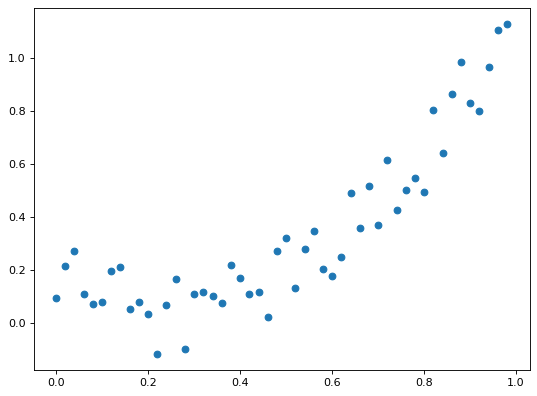

In [3]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(x_grid, y_grid, 'o')

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_grid, y_grid, test_size=0.2, random_state=600)

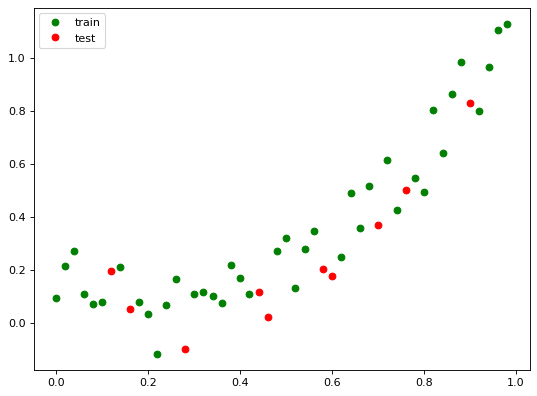

In [5]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(X_train, y_train, 'go', label='train')
plt.plot(X_test, y_test, 'ro', label='test')
plt.legend()

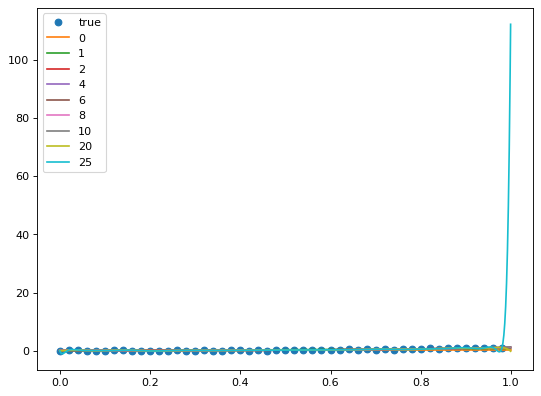

In [14]:
# polynomial fits of various orders
plt.figure(figsize=(8, 6), dpi=80)
x_grid_fine = np.arange(start=0,stop=1,step=0.001)
plt.plot(x_grid, y_grid, 'o', label='true')

from sklearn.metrics import mean_squared_error

degree = []
err_train_vect = []
err_test_vect = []

#for d in [1]:
for d in [0,1,2,4,6,8,10, 20, 25]:
#for d in range(0,7):
#for d in [2,3,4]:
    r = Polynomial.fit(X_train, y_train, deg=d)
    y_pred_grid = r(x_grid_fine)
    plt.plot(x_grid_fine, y_pred_grid, '-', label = f'{d}')
    
    y_pred_train = r(X_train)
    y_pred_test = r(X_test)
    err_train = mean_squared_error(y_pred_train, y_train)
    err_test = mean_squared_error(y_pred_test, y_test)
    
    degree.append(d)
    err_train_vect.append(err_train)
    err_test_vect.append(err_test)

plt.legend(loc="upper left")

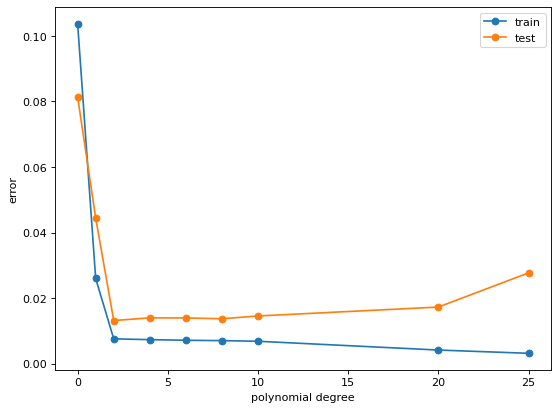

In [15]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(degree, err_train_vect, '-o', label='train')
plt.plot(degree, err_test_vect, '-o', label='test')
plt.xlabel('polynomial degree')
plt.ylabel('error')
plt.legend()